# Import Libraries
Import necessary libraries such as pandas, numpy, matplotlib, seaborn, and machine learning libraries like scikit-learn, XGBoost, and CatBoost.

In [23]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, accuracy_score

# Load and Inspect Data
Load the dataset using pandas, display its shape, columns, and check for missing values.

In [24]:
# Load and Inspect Data

# Load the dataset
# Note: Replace 'inflation_data.csv' with your file path
data = pd.read_csv('global_inflation_data.csv')

# Display basic information
print("Data Shape:", data.shape)
print("Data Columns:\n", data.columns)

# Check missing values
print("\nMissing Values:\n", data.isnull().sum())

Data Shape: (196, 47)
Data Columns:
 Index(['country_name', 'indicator_name', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022', '2023', '2024'],
      dtype='object')

Missing Values:
 country_name       0
indicator_name     0
1980              56
1981              52
1982              51
1983              51
1984              51
1985              51
1986              51
1987              49
1988              49
1989              49
1990              46
1991              41
1992              38
1993              27
1994              25
1995              24
1996              20
1997              17
1998              15
1999              14
2000              13
200

# Data Preprocessing
Fill missing values, separate features and target, and perform train-test split.

In [25]:
# Data Preprocessing

# Fill missing values with column mean (only for numeric columns)
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Separate features and target
feature_columns = [str(year) for year in range(1980, 2024)]  # 1980-2023
X = data[feature_columns]
y = data['2024']  # Predicting 2024 inflation

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Visualization
Create visualizations including a line plot for a sample country, a correlation heatmap, and a histogram of 2024 inflation rates.

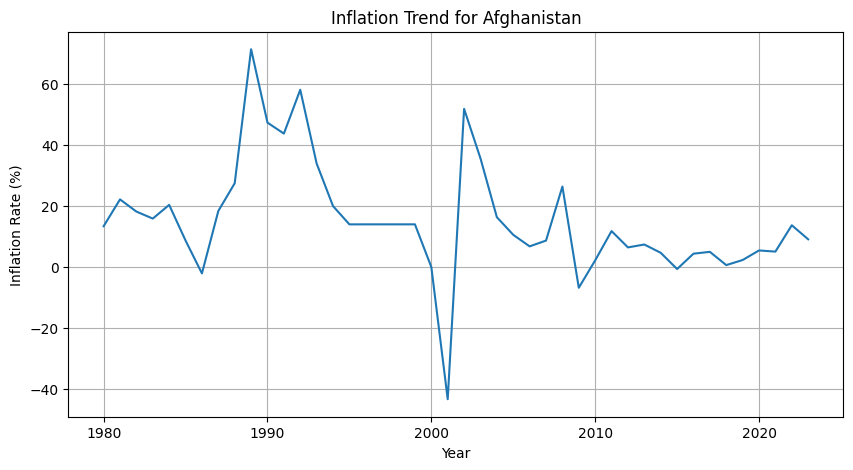

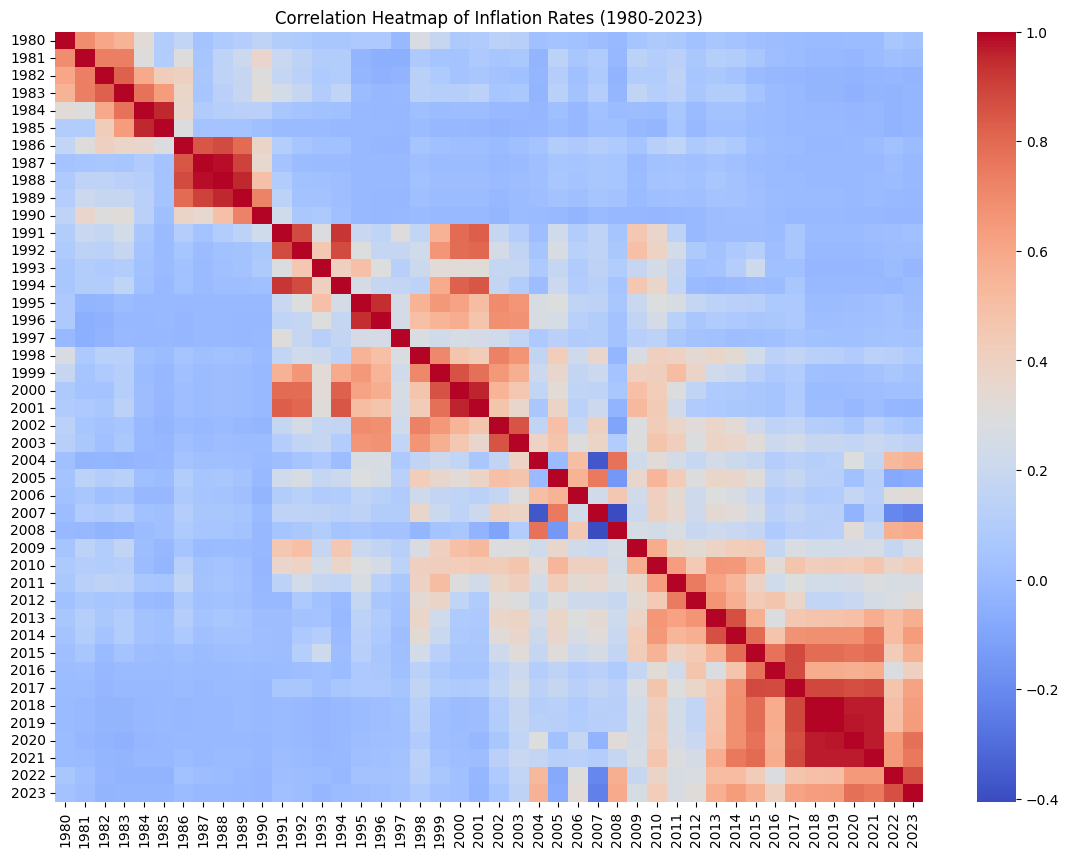

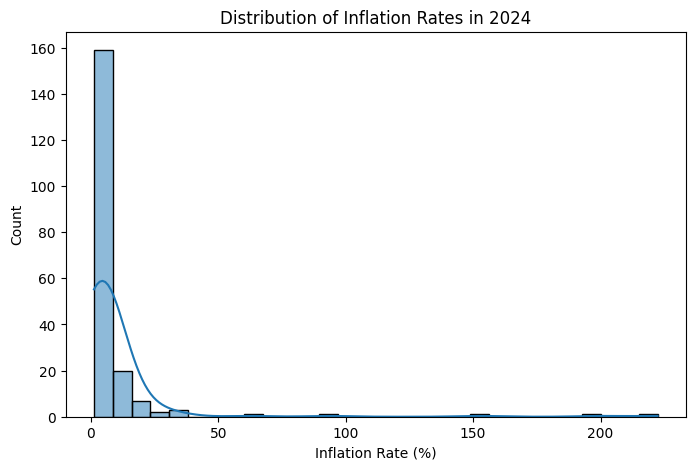

In [26]:
# Data Visualization

# 4.1 Line Plot for Sample Country
plt.figure(figsize=(10,5))
example_country = data.iloc[0]
example_country[feature_columns].plot()
plt.title(f"Inflation Trend for {example_country['country_name']}")
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.grid()
plt.show()

# 4.2 Correlation Heatmap
plt.figure(figsize=(14,10))
sns.heatmap(X.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap of Inflation Rates (1980-2023)')
plt.show()

# 4.3 Histogram of 2024 Inflation
plt.figure(figsize=(8,5))
sns.histplot(y, kde=True, bins=30)
plt.title('Distribution of Inflation Rates in 2024')
plt.xlabel('Inflation Rate (%)')
plt.show()

# Logistic Regression (Classifying High vs Low Inflation)
Classify inflation as high or low using logistic regression, scale features, train the model, and evaluate its performance.


Logistic Regression Classification Accuracy: 0.8673469387755102


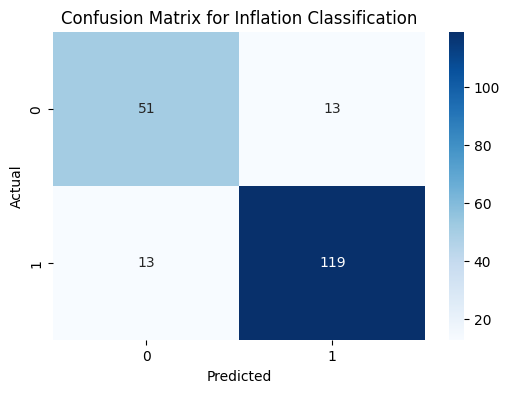

In [27]:
# Logistic Regression (Bonus: Classifying High vs Low Inflation)

# Create binary labels: High (1) if inflation > 3%, else Low (0)
data['inflation_class'] = (data['2024'] > 3).astype(int)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_scaled, data['inflation_class'])

# Predict
y_pred_class = log_model.predict(X_scaled)

# Evaluate
print("\nLogistic Regression Classification Accuracy:", accuracy_score(data['inflation_class'], y_pred_class))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(data['inflation_class'], y_pred_class), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Inflation Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Ensemble Models: RF, XGBoost, CatBoost
Train Random Forest, XGBoost, and CatBoost models, make predictions, and perform ensemble averaging.

In [28]:
# Ensemble Models: RF, XGBoost, CatBoost

# Initialize models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
cat_model = CatBoostRegressor(iterations=100, silent=True, random_state=42)

# Train models
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
cat_model.fit(X_train, y_train)

# Predict
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
cat_preds = cat_model.predict(X_test)

# Ensemble Prediction (Simple Averaging)
ensemble_preds = (0.6 * xgb_preds) + (0.25 * cat_preds) + (0.15 * rf_preds)

# Model Evaluation
Evaluate the performance of individual models and the ensemble using RMSE.

In [29]:
# Model Evaluation

# Random Forest Evaluation
print("\nRandom Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_preds)))

# XGBoost Evaluation
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, xgb_preds)))

# CatBoost Evaluation
print("CatBoost RMSE:", np.sqrt(mean_squared_error(y_test, cat_preds)))

# Ensemble Evaluation
print("Ensemble RMSE:", np.sqrt(mean_squared_error(y_test, ensemble_preds)))


Random Forest RMSE: 3.32230667792707
XGBoost RMSE: 2.1399156295122754
CatBoost RMSE: 2.7906181690721907
Ensemble RMSE: 2.295805640165195


# Conclusion
Summarize findings, discuss the effectiveness of ensemble methods, and suggest future work.

In [30]:
# Conclusion

print("""
Conclusion:
- Inflation data can be used for both classification (high/low inflation) and regression (predicting exact rates).
- Ensemble methods combining Random Forest, XGBoost, and CatBoost provided robust predictions.
- Visualization showed important trends and correlations.
- Logistic Regression offered an interesting side exploration into classification of inflation levels.

Future Work:
- Add external features like GDP, unemployment rate.
- Try advanced stacking models for better ensembling.
- Extend prediction horizon (2025-2030).
""")


Conclusion:
- Inflation data can be used for both classification (high/low inflation) and regression (predicting exact rates).
- Ensemble methods combining Random Forest, XGBoost, and CatBoost provided robust predictions.
- Visualization showed important trends and correlations.
- Logistic Regression offered an interesting side exploration into classification of inflation levels.

Future Work:
- Add external features like GDP, unemployment rate.
- Try advanced stacking models for better ensembling.
- Extend prediction horizon (2025-2030).



In [31]:
# Save the CatBoost model to a file
cat_model.save_model("cat_model.cbm")